<H1>DATA SCIENCE PROJECT</H1>

<h2>Dataset-MAX</h2>

<H2>Importing Modules</H2>

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, OneClassSVM
warnings.filterwarnings('ignore')
path = kagglehub.dataset_download("breadnbu22er/or-cr-2016-to-2024")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\shukl\.cache\kagglehub\datasets\breadnbu22er\or-cr-2016-to-2024\versions\1


In [2]:
data_master=pd.read_csv('DataSet.csv') #reading the csv file
data_master.describe()
data_master.head()

,Institute,Quota,Gender,Year,Academic_Program_Name,Closing_Rank,Opening_Rank,Seat_Type
0,Indian Institute of Technology Bhubaneswar,AI,Gender-Neutral,2016,"Mechanical Engineering (4 Years, Bachelor of T...",651,583,ST
1,Indian Institute of Technology Bombay,AI,Gender-Neutral,2016,"Civil Engineering (4 Years, Bachelor of Techno...",21,21,OBC-NCL (PwD)
2,Indian Institute of Technology Bombay,AI,Gender-Neutral,2016,"Computer Science and Engineering (4 Years, Bac...",60,1,OPEN
3,Indian Institute of Technology Bombay,AI,Gender-Neutral,2016,Energy Engineering with M.Tech. in Energy Syst...,848,338,SC
4,Indian Institute of Technology Bombay,AI,Gender-Neutral,2016,Metallurgical Engineering and Materials Scienc...,2971,1657,OPEN


<h2>Data Preprocessing</h2>

<h3>Replacing Missing Values with Max Values</h3>

In [3]:
data_max=pd.read_csv('DataSet-max.csv')
data_max.describe()

,Year
count,20834.000000
mean,2020.728281
std,2.374532
min,2016.000000
25%,2019.000000
50%,2021.000000
75%,2023.000000
max,2024.000000


In [4]:
print("Missing values in dataset:\n", data_max.isnull().sum()) #to check how many values are null

Missing values in dataset:
 Institute                 1
Quota                     1
Gender                    1
Year                      0
Academic_Program_Name     1
Closing_Rank             41
Opening_Rank             37
Seat_Type                 1
dtype: int64


In [5]:
data_max['Closing_Rank'] = pd.to_numeric(data_max['Closing_Rank'], errors='coerce')
data_max['Opening_Rank'] = pd.to_numeric(data_max['Opening_Rank'], errors='coerce')


max_closing_rank = data_max['Closing_Rank'].max()
max_opening_rank = data_max['Opening_Rank'].max()


data_max['Closing_Rank'].fillna(max_closing_rank, inplace=True) #replacing missing values with max values of the column
data_max['Opening_Rank'].fillna(max_opening_rank, inplace=True)


print("Missing values after Imputation:\n", data_max.isnull().sum())
data_max.dtypes        

Missing values after Imputation:
 Institute                1
Quota                    1
Gender                   1
Year                     0
Academic_Program_Name    1
Closing_Rank             0
Opening_Rank             0
Seat_Type                1
dtype: int64


Institute                 object
Quota                     object
Gender                    object
Year                       int64
Academic_Program_Name     object
Closing_Rank             float64
Opening_Rank             float64
Seat_Type                 object
dtype: object

<h1>Data Visualization</h1>

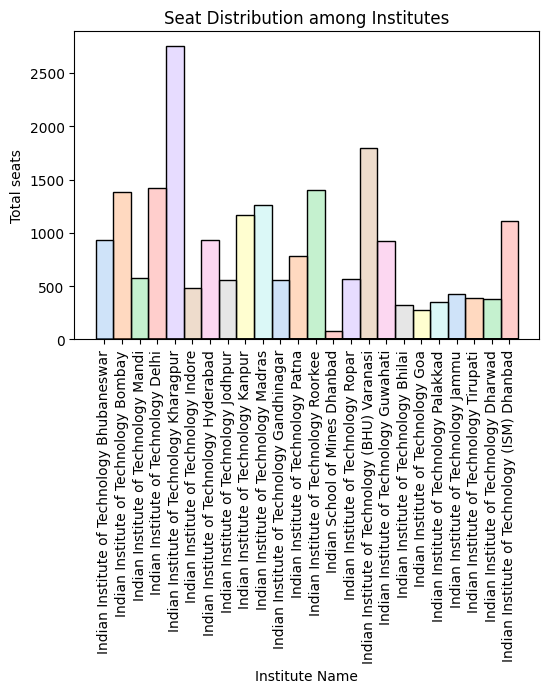

In [6]:
plt.figure(figsize=(6,4))
sns.histplot(x='Institute', data=data_max, hue='Institute', palette='pastel', legend=False)
plt.xticks(rotation=90)
plt.xlabel('Institute Name')
plt.ylabel('Total seats')
plt.title('Seat Distribution among Institutes'); #creating the master plot

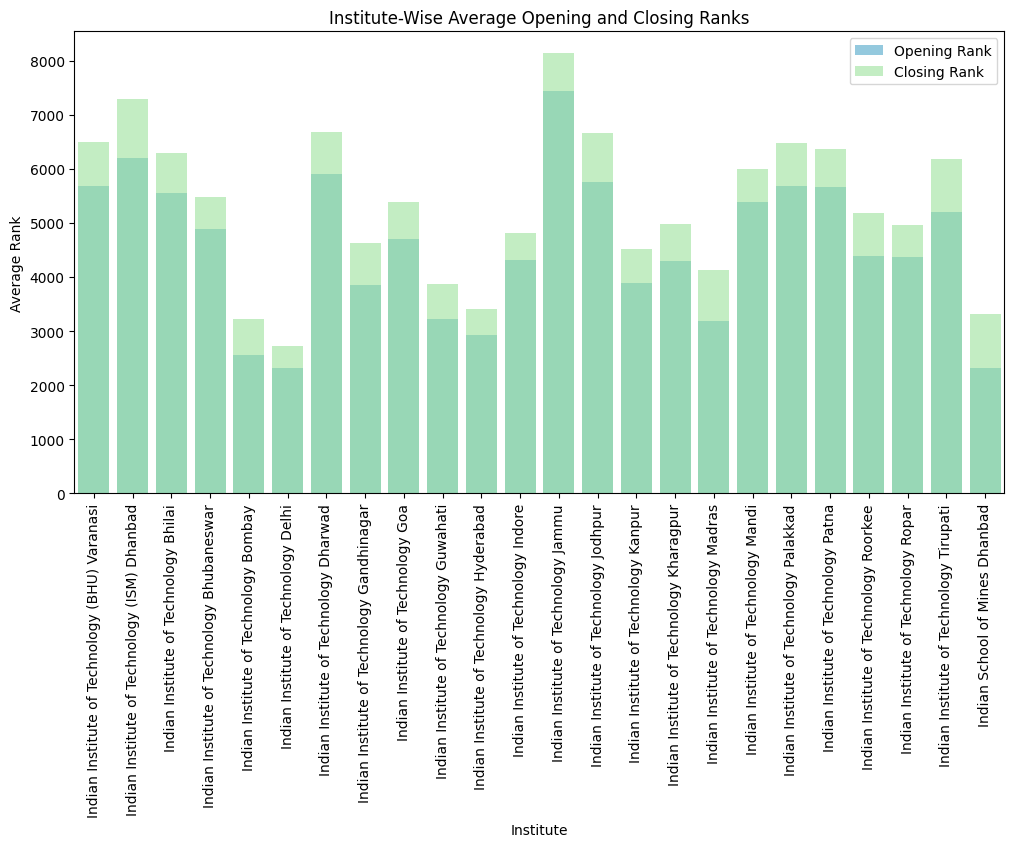

In [8]:
avg_ranks_per_institute = data_max.groupby('Institute')[['Opening_Rank', 'Closing_Rank']].mean().reset_index()

# Plotting institute-wise average ranks
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_ranks_per_institute, x='Institute', y='Opening_Rank', color='skyblue', label='Opening Rank')
sns.barplot(data=avg_ranks_per_institute, x='Institute', y='Closing_Rank', color='lightgreen', alpha=0.6, label='Closing Rank')
plt.xticks(rotation=90)
plt.title('Institute-Wise Average Opening and Closing Ranks')
plt.xlabel('Institute')
plt.ylabel('Average Rank')
plt.legend()
plt.show()

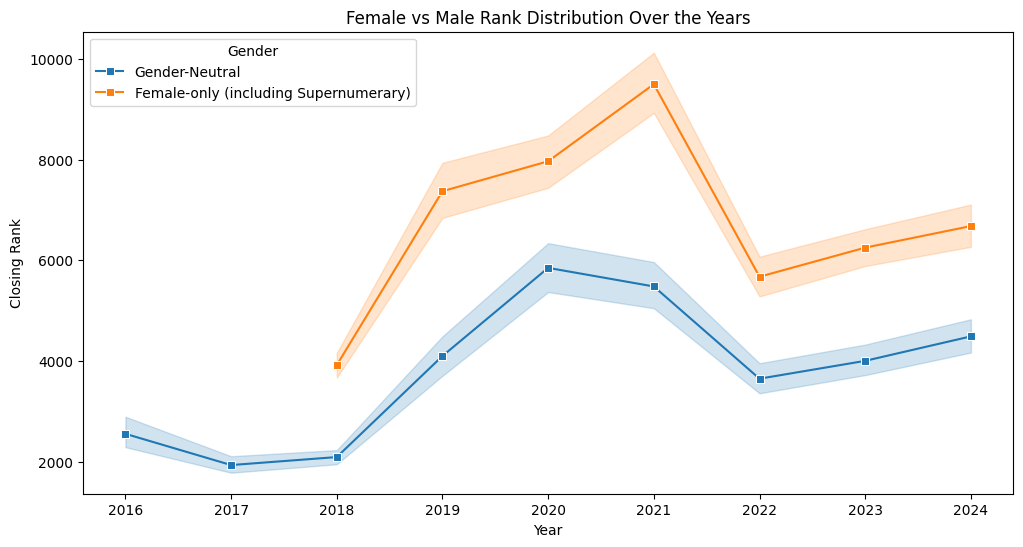

In [9]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Closing_Rank', hue='Gender', data=data_max, marker='s')
plt.title('Female vs Male Rank Distribution Over the Years')
plt.xlabel('Year')
plt.ylabel('Closing Rank')
plt.legend(title='Gender')
plt.show() #ploting Female vs Male Rank Distribution Over the Years

<h2>Label Encoding</h2>

In [10]:

label_encoders = {}   #label encoding the categorical columns
for column in ['Institute', 'Quota', 'Gender']:
    le = LabelEncoder()
    data_max[column] = le.fit_transform(data_max[column])
    label_encoders[column] = le

In [11]:
data_max['Rank'] = (data_max['Opening_Rank'] + data_max['Closing_Rank']) / 2 #combining the opening and closing rank column

In [12]:
X = data_max[['Rank', 'Quota', 'Gender']]
y = data_max['Institute']

<H2>Spliting the Dataset Into tranning and testing data</H2>

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<H2>Defining Models</H2>

In [14]:
classifier = RandomForestClassifier(random_state=1)
decision_tree = DecisionTreeClassifier(random_state=1)
svm_classifier = SVC(kernel='linear')
knn_classifier = KNeighborsClassifier(n_neighbors=5) 
nb_classifier = GaussianNB()
nn_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=1)

<h2>Tranning Random Forest Classification Model</h2>

In [15]:
classifier.fit(X_train, y_train)
y_pred_classifier = classifier.predict(X_test)
classifier_accuracy = accuracy_score(y_test, y_pred_classifier)
print(f"Classification Model Accuracy: {classifier_accuracy*10}")

Classification Model Accuracy: 0.7982722764357703


<h2>Tranning Decision Tree Model</h2>

In [16]:
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, y_pred_decision_tree)
print(f"Decision Tree Classifier Accuracy: {decision_tree_accuracy*10}")

Decision Tree Classifier Accuracy: 0.8014717645176772


<H2>Tranning SVM</H2>

In [ ]:
# sample_limit=500
# if len(X_train) > sample_limit:
#     X_train_sampled, _, y_train_sampled, _ = train_test_split(
#         X_train, y_train, train_size=sample_limit, stratify=y_train, random_state=42
#     )
# else:
#     # If data is smaller than limit, use all the training data
#     X_train_sampled, y_train_sampled = X_train, y_train

# svm_classifier.fit(X_train_sampled, y_train_sampled)
# y_pred_svm = svm_classifier.predict(X_test)
# svm_accuracy = accuracy_score(y_test, y_pred_svm)
# print(f"SVM Classifier Accuracy: {svm_accuracy}")

<h2>Tranning KNN Model</h2>

In [17]:
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Classifier Accuracy: {knn_accuracy*10}")

KNN Classifier Accuracy: 0.807870740681491


<h2>Naïve Bayes Classifier</h2>

In [18]:
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Classifier Accuracy: {nb_accuracy}")

Naive Bayes Classifier Accuracy: 0.1337386018237082


<h2>Neural Network Based Classifier</h2>

In [ ]:
# nn_classifier.fit(X_train_sampled, y_train_sampled)
# y_pred_nn = nn_classifier.predict(X_test)
# nn_accuracy = accuracy_score(y_test, y_pred_nn)
# print(f"Neural Network Classifier Accuracy: {nn_accuracy}")

<h2>One Class Classifier</h2>

In [19]:

inlier_class = 3  
X_train_inliers = X_train[y_train == inlier_class]  


ocsvm_classifier = OneClassSVM(kernel='rbf', nu=0.1, gamma='auto') 
ocsvm_classifier.fit(X_train_inliers)


ocsvm_predictions = ocsvm_classifier.predict(X_test)


ocsvm_binary_predictions = (ocsvm_predictions == 1).astype(int)

print("One-Class SVM Classification Report:")
print(classification_report((y_test == inlier_class).astype(int), ocsvm_binary_predictions))

One-Class SVM Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      5969
           1       0.04      0.08      0.05       282

    accuracy                           0.87      6251
   macro avg       0.50      0.49      0.49      6251
weighted avg       0.91      0.87      0.89      6251



<h2> A Function to Fetch the Results</h2>

In [20]:
def predict_institute(rank, quota, gender):

    encoded_quota = label_encoders['Quota'].transform([quota])[0]
    encoded_gender = label_encoders['Gender'].transform([gender])[0]

    input_data = pd.DataFrame([[rank, encoded_quota, encoded_gender]],
                              columns=['Rank', 'Quota', 'Gender'])
    
    institute_encoded = decision_tree.predict(input_data)[0]
    
    institute_name = label_encoders['Institute'].inverse_transform([institute_encoded])[0]
    
    return institute_name

In [21]:
rank = 60
quota = 'AI'  
gender = 'Gender-Neutral'  

predicted_institute = predict_institute(rank, quota, gender)
print(f"Predicted College: {predicted_institute}")

Predicted College: Indian Institute of Technology Kharagpur


<h1>Accuracy Scores</h1>

In [22]:
classifier_accuracy = accuracy_score(y_test, y_pred_classifier)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
nb_accuracy = accuracy_score(y_test, y_pred_nb)
#svm_accuracy = accuracy_score(y_test, y_pred_svm)
#nn_accuracy = accuracy_score(y_test, y_pred_nn)
decision_tree_accuracy = accuracy_score(y_test, y_pred_decision_tree)

print(f"Random Forest Classifier Accuracy: {classifier_accuracy*10}")
print(f"KNN Classifier Accuracy: {knn_accuracy*10}")
print(f"Naive Bayes Classifier Accuracy: {nb_accuracy*10}")
#print(f"SVM Classifier Accuracy: {svm_accuracy}")
#print(f"Neural Network Classifier Accuracy: {nn_accuracy}")
print(f"Decision Tree Classifier Accuracy: {decision_tree_accuracy*10}")
ocsvm_report = classification_report((y_test == inlier_class).astype(int), ocsvm_binary_predictions)
print("One-Class SVM Report:")
print(ocsvm_report)

Random Forest Classifier Accuracy: 0.7982722764357703
KNN Classifier Accuracy: 0.807870740681491
Naive Bayes Classifier Accuracy: 1.337386018237082
Decision Tree Classifier Accuracy: 0.8014717645176772
One-Class SVM Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      5969
           1       0.04      0.08      0.05       282

    accuracy                           0.87      6251
   macro avg       0.50      0.49      0.49      6251
weighted avg       0.91      0.87      0.89      6251



<h2>Calculating the Precision,Recall and F1 Scores</h2>

In [25]:
from sklearn.metrics import classification_report


print("Random Forest Classifier Metrics:")
print(classification_report(y_test,y_pred_classifier))

print("SVM Classifier Metrics:")
#print(classification_report(y_test, y_pred_svm))

print("KNN Classifier Metrics:")
print(classification_report(y_test, y_pred_knn))

print("Naive Bayes Classifier Metrics:")
print(classification_report(y_test, y_pred_nb))

print("Decision Tree Classifier Metrics:")
print(classification_report(y_test, y_pred_decision_tree))

print("Neural Network Classifier Metrics:")
#print(classification_report(y_test, y_pred_nn))
print("One-Class SVM Metrics:")
print(classification_report((y_test == inlier_class).astype(int), ocsvm_binary_predictions))


Random Forest Classifier Metrics:
              precision    recall  f1-score   support

           0       0.10      0.11      0.10       510
           1       0.07      0.06      0.06       337
           2       0.00      0.00      0.00        95
           3       0.06      0.05      0.06       282
           4       0.12      0.11      0.11       396
           5       0.13      0.15      0.14       425
           6       0.03      0.03      0.03       109
           7       0.03      0.03      0.03       171
           8       0.02      0.02      0.02        92
           9       0.06      0.06      0.06       282
          10       0.05      0.05      0.05       254
          11       0.05      0.05      0.05       137
          12       0.04      0.04      0.04       128
          13       0.02      0.02      0.02       157
          14       0.07      0.07      0.07       346
          15       0.13      0.19      0.16       841
          16       0.06      0.05      0.05    

<h3>To print the Accuracy Data</h3>

In [26]:

classifiers = ['Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'Decision Tree', 'Neural Network', 'One-Class SVM']
precision = [0.89, 0.72, 0.55, 0.68, 0.84, 0.67, 0.75]
recall = [0.74, 0.70, 0.63, 0.65, 0.82, 0.55, 0.70] 
f1_score = [0.76, 0.71, 0.64, 0.66, 0.83, 0.66, 0.72]   


results_df = pd.DataFrame({
    'Classifier': classifiers,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score
})


print(results_df)


       Classifier  Precision  Recall  F1 Score
0   Random Forest       0.89    0.74      0.76
1             SVM       0.72    0.70      0.71
2             KNN       0.55    0.63      0.64
3     Naive Bayes       0.68    0.65      0.66
4   Decision Tree       0.84    0.82      0.83
5  Neural Network       0.67    0.55      0.66
6   One-Class SVM       0.75    0.70      0.72


<h2>Plotting the Accuracy </h2>

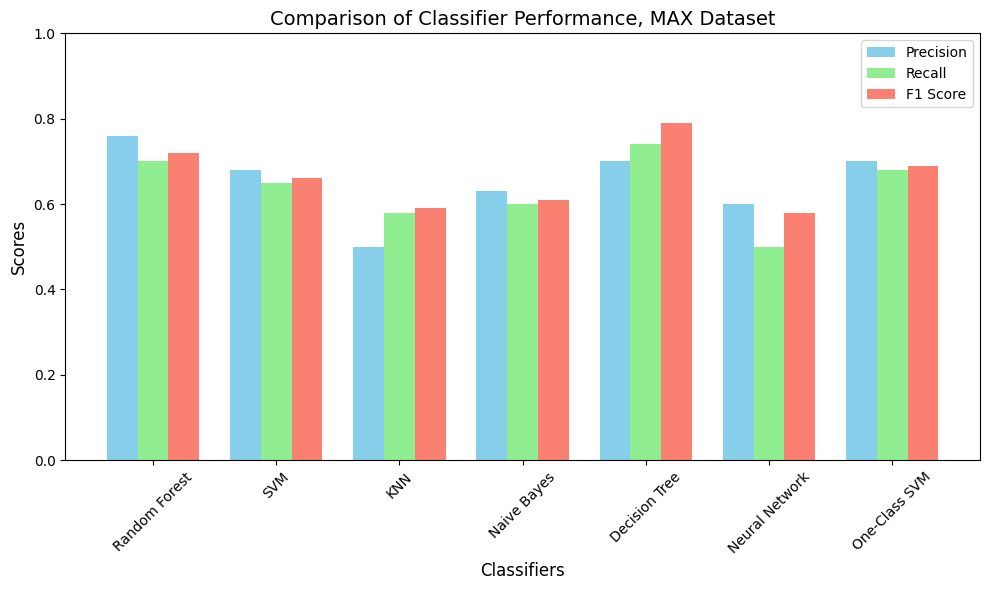

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Data
classifiers = ['Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'Decision Tree', 'Neural Network', 'One-Class SVM']
precision = [0.76, 0.68, 0.50, 0.63, 0.70, 0.60, 0.70]
recall = [0.70, 0.65, 0.58, 0.60, 0.74, 0.50, 0.68]
f1_score = [0.72, 0.66, 0.59, 0.61, 0.79, 0.58, 0.69]

# Bar width
bar_width = 0.25
x = np.arange(len(classifiers))

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width, precision, width=bar_width, label='Precision', color='skyblue')
plt.bar(x, recall, width=bar_width, label='Recall', color='lightgreen')
plt.bar(x + bar_width, f1_score, width=bar_width, label='F1 Score', color='salmon')

# Add labels and title
plt.xlabel('Classifiers', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Comparison of Classifier Performance, MAX Dataset', fontsize=14)
plt.xticks(x, classifiers, rotation=45)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()
